In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
df = pd.read_csv('ford1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4
...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5


In [52]:
df['age']=(2021-df['year'])
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0,4
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5,6
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0,5
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0,2
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4,8
...,...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5,4
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6,7
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0,2
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5,4


In [53]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000,377.000000
mean,5.687003,2017.140584,12882.128376,1.029178,20840.905229,1.286472,114.94695,57.718568,1.361538,3.859416
std,3.501924,1.568938,4171.620044,0.344713,14661.701999,0.957975,57.93657,8.954505,0.400904,1.568938
min,0.000000,2013.000000,4699.000000,0.000000,7.000000,0.000000,0.00000,34.400000,1.000000,1.000000
25%,4.000000,2016.000000,9698.000000,1.000000,9781.000000,0.000000,125.00000,53.300000,1.000000,3.000000
50%,5.000000,2017.000000,12198.000000,1.000000,17028.000000,2.000000,145.00000,58.900000,1.200000,4.000000
75%,7.000000,2018.000000,15984.000000,1.000000,29326.000000,2.000000,145.00000,64.200000,1.600000,5.000000
max,16.000000,2020.000000,25706.397718,2.000000,66207.067810,2.000000,240.00000,80.700000,2.300000,8.000000


In [54]:
df['priceLevel']=np.where (df['price']<=12882,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0,4,0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5,6,0
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0,5,0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0,2,1
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4,8,0
...,...,...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5,4,0
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6,7,0
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0,2,1
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5,4,0


In [55]:
# Splitting the dataset into the Training set and Test set
a=['model','type','distance','fuel','tax','miles per galoon','size', 'age']
X = df[a]
y = df['priceLevel']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [57]:
#Feature Selection
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.318390
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.539     
Dependent Variable: priceLevel       AIC:              207.6708  
Date:               2021-12-28 02:20 BIC:              237.3277  
No. Observations:   301              Log-Likelihood:   -95.835   
Df Model:           7                LL-Null:          -208.04   
Df Residuals:       293              LLR p-value:      7.6645e-45
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.2677      0.2339     1.1446    0.2524    -0.1907     0.7262
x2    -0.2549      0.2159    -1.1807    0.2377    -0.6

Больше всего влияют факторы 3, 7 и 8, а менее всего - 1

In [58]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

8
[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [59]:
#fitting logistic regression
# Leaving only Selected Features
X_train_select=X_train[:,[False, False,  True,  False, False, False, False, True]]
X_test_select=X_test[:,[False, False,  True,  False, False, False, False, True]]

In [60]:
X_train_select

array([[ 2.46489575,  2.66966639],
       [-0.27588752,  0.09205746],
       [-1.09788458, -1.196747  ],
       [ 2.35836261,  0.73645969],
       [-0.39226771, -0.55234477],
       [-0.50375742,  0.73645969],
       [ 2.03532662,  0.73645969],
       [ 2.86882292,  1.38086193],
       [-1.0781244 , -1.196747  ],
       [ 0.92373386,  0.73645969],
       [-0.93861356, -1.196747  ],
       [ 0.12057175,  0.09205746],
       [-0.83551697,  0.73645969],
       [-0.74431614,  0.09205746],
       [ 0.05276592,  0.09205746],
       [-1.23898152, -0.55234477],
       [-0.34752643,  0.09205746],
       [-0.81172545, -0.55234477],
       [-0.54327778,  0.09205746],
       [ 0.45834527, -0.55234477],
       [-0.67128939, -1.196747  ],
       [-0.30106688,  0.73645969],
       [ 0.04529802,  0.73645969],
       [-1.1195613 ,  0.09205746],
       [-0.80842107, -0.55234477],
       [-1.30328472, -1.196747  ],
       [ 1.18213622,  2.66966639],
       [-0.65873275,  0.09205746],
       [-0.41255659,

In [61]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [62]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.724

Данная модель имеет 27,6% ошибок

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  8]
 [13 21]]


55 примеров корректны, 21 - нет

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


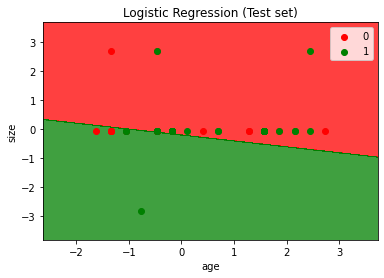

In [64]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('age')
plt.ylabel('size')
plt.legend()
plt.show()

In [65]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('ford4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()